In [2]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/juahan/opt/anaconda3/lib/python3.7/site-packages (0.0)


In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("../Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df.keys()

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
X = df.drop('koi_disposition', axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


y: koi_disposition
X: koi_score, koi_period (orbital period), koi_impact, koi_duration(transit duration), koi_depth, koi_prad, koi_teq, 

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
y = df['koi_disposition']
target_names = ["confirmed","false positive"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6464,0,1,0,0,0.676990,3.700000e-08,-3.700000e-08,131.801710,0.000046,-0.000046,...,-174,4.568,0.044,-0.176,0.816,0.213,-0.071,294.58789,41.914261,15.553
2016,0,0,0,0,8.436398,1.090000e-05,-1.090000e-05,179.887040,0.001030,-0.001030,...,-103,4.547,0.040,-0.050,0.795,0.053,-0.043,282.13553,43.039101,12.990
4932,0,1,1,1,1.036592,5.140000e-07,-5.140000e-07,132.089545,0.000434,-0.000434,...,-72,2.737,0.162,-0.108,8.747,1.504,-2.256,294.36172,50.307598,11.449
2828,0,0,1,0,143.196381,2.687000e-03,-2.687000e-03,227.305400,0.013600,-0.013600,...,-179,4.333,0.180,-0.180,1.060,0.282,-0.205,295.53394,39.762249,14.034
3812,1,0,0,0,96.231257,1.159000e-03,-1.159000e-03,217.000330,0.007500,-0.007500,...,-122,2.674,0.030,-0.030,9.529,0.771,-1.800,296.44431,42.287350,13.648


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [12]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled,y_train)
    test_score = knn.score(X_test_scaled,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k:{k} Training score/Test score: {train_score}/{test_score}")


k:1 Training score/Test score: 1.0/0.8077803203661327
k:3 Training score/Test score: 0.906732786572573/0.834096109839817
k:5 Training score/Test score: 0.8891855807743658/0.8346681922196796
k:7 Training score/Test score: 0.8804119778752623/0.8403890160183066
k:9 Training score/Test score: 0.8756437154300972/0.8363844393592678
k:11 Training score/Test score: 0.8687774175090597/0.8352402745995423
k:13 Training score/Test score: 0.8630555025748617/0.8346681922196796
k:15 Training score/Test score: 0.8586687011253099/0.8289473684210527
k:17 Training score/Test score: 0.8577150486362769/0.8255148741418764
k:19 Training score/Test score: 0.8561892046538242/0.8260869565217391


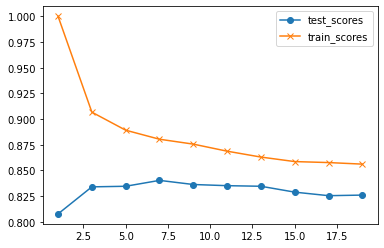

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,20,2), test_scores,marker="o",label="test_scores")
plt.plot(range(1,20,2),train_scores,marker="x",label="train_scores")
plt.legend(loc="upper right")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.840


In [26]:
predictions = knn.predict(X_test_scaled)

In [34]:
import numpy as np
y_test = np.array(y_test)

for x in range(0,5,1):
    print(f"Predictions: {predictions[x]}, Actual: {y_test[x]}")

Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE
Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE
Predictions: CANDIDATE, Actual: CANDIDATE
Predictions: FALSE POSITIVE, Actual: FALSE POSITIVE
Predictions: CONFIRMED, Actual: CONFIRMED


In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)